In [11]:
import gain_functions as gf
import fast_mfcf as fast_mfcf

# For TMFG import
# from fast_tmfg import *

import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import itertools
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

ModuleNotFoundError: No module named 'tqdm'

# MST vs MFCF

In [2]:
def build_graph(connection_list):
    G = nx.Graph()
    for connection in connection_list:
        if not connection:
            raise ValueError("Empty connection is not allowed.")
        # Add all nodes in the connection
        for node in connection:
            G.add_node(node)
        # If more than one node, add edges between all pairs of nodes
        if len(connection) > 1:
            for node1, node2 in itertools.combinations(connection, 2):
                G.add_edge(node1, node2)
    return G

In [20]:
p = 20
T = 3000


X = np.random.normal(0,1,(T,p))

C = np.corrcoef(X, rowvar=False)
    
C_MST = 1 - np.square(C)


ctl = fast_mfcf.mfcf_control()
ctl['threshold'] = 0.00
ctl['drop_sep'] = False
ctl['min_clique_size'] = 1
ctl['max_clique_size'] = 2
ctl['coordination_number'] = np.inf
gain_function = gf.sumsquares_gen

cliques, separators, peo, gt = fast_mfcf.fast_mfcf(C, ctl, gain_function)
cliques
print(peo)
print(cliques)
print(separators)

[11, 1, 14, 10, 4, 8, 7, 6, 17, 3, 12, 13, 19, 2, 15, 5, 9, 18, 0, 16]
[frozenset({1, 11}), frozenset({11, 14}), frozenset({10, 14}), frozenset({11, 4}), frozenset({8, 4}), frozenset({1, 7}), frozenset({10, 6}), frozenset({17, 6}), frozenset({17, 3}), frozenset({3, 12}), frozenset({13, 6}), frozenset({19, 13}), frozenset({2, 19}), frozenset({2, 15}), frozenset({8, 5}), frozenset({9, 7}), frozenset({18, 13}), frozenset({0, 17}), frozenset({16, 11})]
[frozenset({11}), frozenset({14}), frozenset({4}), frozenset({1}), frozenset({10}), frozenset({6}), frozenset({17}), frozenset({3}), frozenset({6}), frozenset({13}), frozenset({19}), frozenset({2}), frozenset({8}), frozenset({7}), frozenset({13}), frozenset({17})]


Text(0.5, 1.0, 'MFCF')

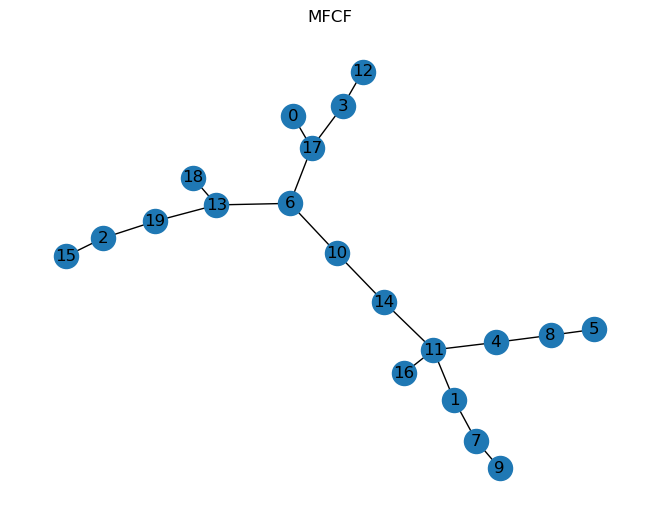

In [23]:
graph = build_graph(cliques)
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)
plt.title('MFCF')

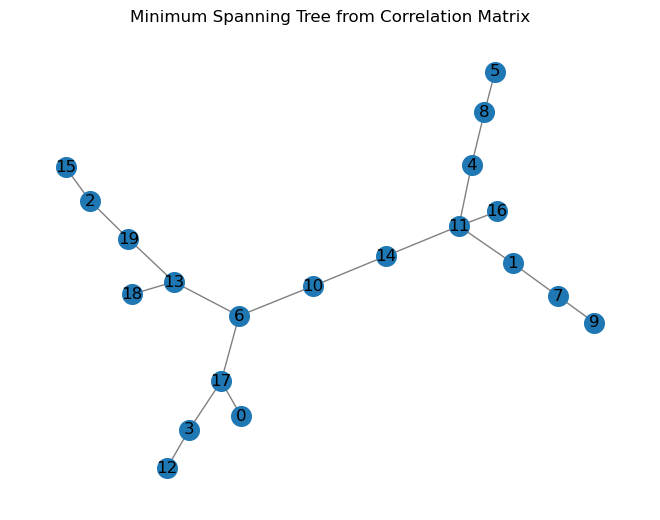

In [24]:
def corr_graph(m):
    
    G = nx.Graph()
    n = m.shape[0]
    
    for i in range(n):
        for j in range(i+1,n):
            G.add_edge(i, j, weight=m[i, j])
    
    return G
            




G = corr_graph(np.square(C_MST))



# Compute the minimum spanning tree from the graph.
mst = nx.minimum_spanning_tree(G,algorithm='prim')

# Draw the MST.
pos = nx.spring_layout(mst)  # Compute positions for visualization.
nx.draw(mst, pos, with_labels=True, edge_color='gray', node_size=200)
plt.title("Minimum Spanning Tree from Correlation Matrix")
plt.show()

# TMFG

In [13]:
p = 10
T = 1000


X = np.random.normal(0,1,(T,p))

C = np.corrcoef(X, rowvar=False)

In [14]:
ctl = fast_mfcf.mfcf_control()
ctl['threshold'] = 0.00
ctl['drop_sep'] = True
ctl['min_clique_size'] = 4
ctl['max_clique_size'] = 4
ctl['method'] = 'TMFG'

gain_function = gf.sumsquares_gen

cliques, separators, peo, gt = fast_mfcf.fast_mfcf(C, ctl, gain_function)
cliques
print(cliques)
print(separators)

[frozenset({8, 9, 6, 7}), frozenset({8, 9, 6, 1}), frozenset({0, 9, 6, 7}), frozenset({0, 2, 6, 7}), frozenset({2, 5, 6, 7}), frozenset({8, 3, 6, 7}), frozenset({2, 4, 5, 6})]
[frozenset({8, 9, 6, 7}), frozenset({8, 9, 6}), frozenset({9, 6, 7}), frozenset({0, 6, 7}), frozenset({2, 6, 7}), frozenset({8, 6, 7}), frozenset({2, 5, 6})]


Text(0.5, 1.0, 'TMFG plotted with MFCF')

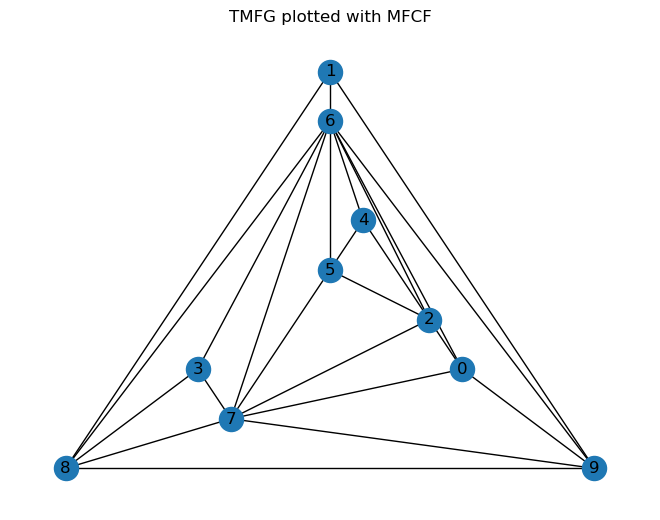

In [15]:
graph = build_graph(cliques)
pos = nx.planar_layout(graph)
nx.draw(graph, pos, with_labels=True)
plt.title('TMFG plotted with MFCF')

In [16]:
# TMFG
M = pd.DataFrame(np.square(np.corrcoef(X, rowvar=False)))
model = TMFG()
cliques_t, seps_t, adj_matrix_t = model.fit_transform(weights=M, output='weighted_sparse_W_matrix')

Text(0.5, 1.0, 'TMFG plotted with TMFG')

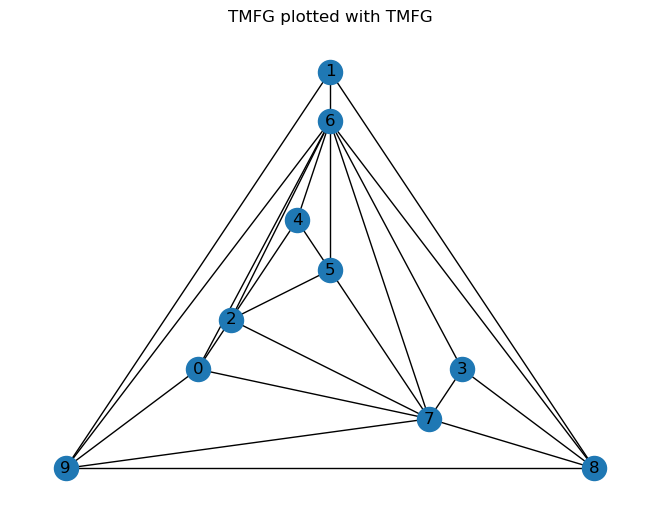

In [17]:
graph = build_graph(cliques_t)
pos = nx.planar_layout(graph)
nx.draw(graph, pos, with_labels=True)
plt.title('TMFG plotted with TMFG')